# Metrics Analyses

This notebooks summarize metric's results on evaluation set, do learning, and plotting

In [1]:
import os
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path

%matplotlib inline

ROOT_DIR = os.path.dirname(os.getcwd())
root_dir = Path(ROOT_DIR)

## 1. Zero entries ratio

This section presents the results for **zero-entries ratio** metric that we have computed for the baseline softmax, entmax15 and sparsemax models, both randomly initialised and trained.

### Trained models

In [2]:
thresholds = ["1e-03", "1e-04", "1e-05", "1e-06", "1e-07", "1e-08", "1e-09", "1e-10"]

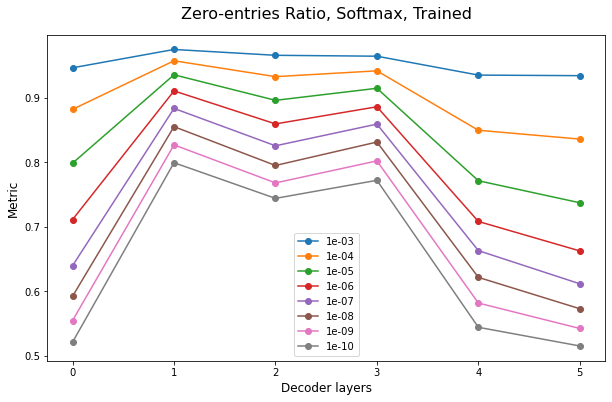

In [5]:
data = []
for th in thresholds:
    fname = root_dir / "temp" / f"softmax-zeros_ratio-{th}.pt"

    with open(fname, "rb") as f:
        in_data = torch.load(fname)
        item = {
            "metric_threshold": th,
            "mean": in_data['mean'],
            "std": in_data['std']
        }
        data.append(item)

fig, ax = plt.subplots(figsize=(10, 6))

for item in data:
    plt.plot(item['mean'], label=item['metric_threshold'], marker='o')

plt.legend()
plt.xlabel("Decoder layers", fontsize=12)
plt.ylabel("Metric", fontsize=12)

plt.title("Zero-entries Ratio, Softmax, Trained", fontsize=16, pad=16)
fig.savefig("./images/softmax-zeros_entries-trained.png", bbox_inches="tight")

### Randomly initialised softmax

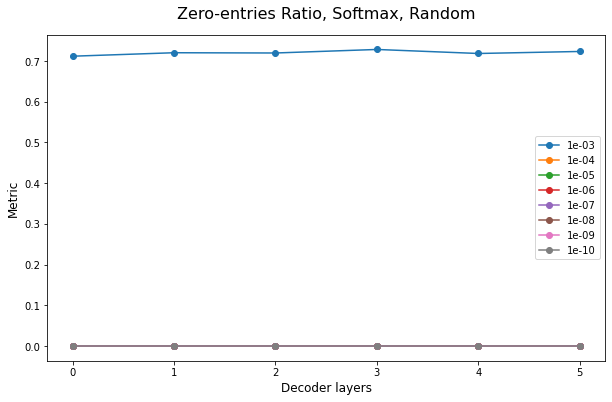

In [8]:
data = []
for th in thresholds:
    fname = root_dir / "temp" / f"softmax-zeros_ratio-{th}-random.pt"

    with open(fname, "rb") as f:
        in_data = torch.load(fname)
        item = {
            "metric_threshold": th,
            "mean": in_data['mean'],
            "std": in_data['std']
        }
        data.append(item)

fig, ax = plt.subplots(figsize=(10, 6))

for item in data:
    plt.plot(item['mean'], label=item['metric_threshold'], marker='o')

plt.legend()
plt.xlabel("Decoder layers", fontsize=12)
plt.ylabel("Metric", fontsize=12)

plt.title("Zero-entries Ratio, Softmax, Random", fontsize=16, pad=16)
fig.savefig("./images/softmax-zeros_entries-random.png", bbox_inches="tight")

## 2. Amount of Attention Inside Bounding Boxes